### In this Project we will use Predictive Modeling to predict who would survive the Titanic disaster.

In [1]:
import numpy as np
import pandas as pd

## Load Dataset

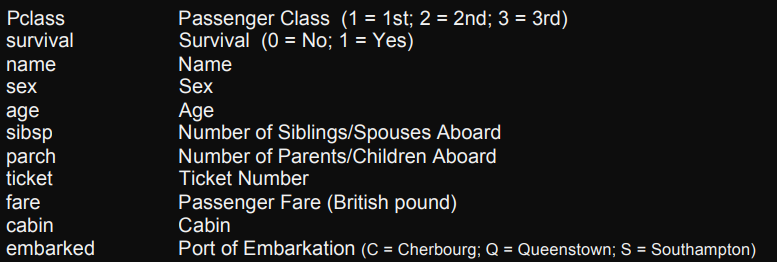

In [20]:
df = pd.read_csv('train.csv',index_col=[0], parse_dates=[0])

In [21]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [22]:
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

## Check Data

Age is a key factor in whether or not a passenger survives. Because in the actual situation, the children will be picked into the lifeboat first.

In this case in Column Age has a 177 Null values (19.87%), So we have to fix this.

In [23]:
df.isna().sum()  

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Drop Cabin because it has a lot of Null values (77.10%)

Drop Ticket because the Ticket Number has no impact in whether or not a passenger survives

In [24]:
df = df.drop('Cabin',axis=1)
df = df.drop('Ticket',axis=1)

In [25]:
df.isna().sum()  

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Prepocessing Data

### Dealing with Age

Let's look at the Name of passengers, we can split a title name from a name of passengers to identify the average of age by their title name.

In [27]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [29]:
df.groupby(['Title','Sex'])['Age'].agg(['mean', 'count'])

mean  count
Title    Sex                     
Capt     male    70.000000      1
Col      male    58.000000      2
Countess female  33.000000      1
Don      male    40.000000      1
Dr       female  49.000000      1
         male    40.600000      5
Jonkheer male    38.000000      1
Lady     female  48.000000      1
Major    male    48.500000      2
Master   male     4.574167     36
Miss     female  21.773973    146
Mlle     female  24.000000      2
Mme      female  24.000000      1
Mr       male    32.368090    398
Mrs      female  35.898148    108
Ms       female  28.000000      1
Rev      male    43.166667      6
Sir      male    49.000000      1

It has too many Title name, Let's categorize it

In [30]:
# Making a dictionary for Title name 

TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}


df['Title']= df.Title.map(TitleDict) 

In [31]:
df.groupby(['Title','Sex'])['Age'].agg(['mean', 'count'])

mean  count
Title   Sex                     
Master  male     4.574167     36
Miss    female  21.804054    148
Mr      male    32.368090    398
Mrs     female  35.718182    110
Officer male    56.600000      5
Royalty female  43.333333      3
        male    42.071429     14

In [32]:
display(df[df.Title.isnull()])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,,


You can see that

- Master is a Male Child

- Mr is a married or unmarried man but he is a middle-aged man

- Mrs is a married women whitch is a middle-aged woman

- Officer is a Adult 

- Royalty is a middle-aged woman and middle-aged man

But Miss, We can't identify that she is a unmarried women who is in middle-aged or she is a female child

So we will use  a Parch features to see that if she travel with or without her parents.

We will assume that if she travel without her parents, she might be in middle-aged, but if she travel with her parents she might be a female child.

In [33]:
print ("Avg age of 'Miss' Title", round(df[df.Title=="Miss"]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling without Parents", round(df[(df.Title=="Miss") & (df.Parch==0)]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling with Parents", round(df[(df.Title=="Miss") & (df.Parch!=0)]['Age'].mean()), '\n')


Avg age of 'Miss' Title 22
Avg age of 'Miss' Title travelling without Parents 28
Avg age of 'Miss' Title travelling with Parents 12 



The Avg age of Miss Title travelling with Parents is 12 years old, So we will categorize them as a FemaleChild.

In [34]:
for i in [df]:
    i.loc[(df.Title=='Miss') & (df.Parch!=0),'Title']="FemaleChild"
    

In [35]:
df.groupby(['Title','Sex'])['Age'].agg(['mean', 'count'])

mean  count
Title       Sex                     
FemaleChild female  11.863636     55
Master      male     4.574167     36
Miss        female  27.682796     93
Mr          male    32.368090    398
Mrs         female  35.718182    110
Officer     male    56.600000      5
Royalty     female  43.333333      3
            male    42.071429     14

#### Fill where Age is Null with Pclass, Sex and Title AVG Age

In [36]:
avg_age = df.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
avg_age

,Sex,Pclass,Title,Age
0,female,1,FemaleChild,21.000000
1,female,1,Miss,34.258065
2,female,1,Mrs,40.400000
3,female,1,Royalty,43.333333
4,male,1,Master,5.306667
5,male,1,Mr,41.580460
6,male,1,Officer,56.600000
7,male,1,Royalty,42.166667
8,female,2,FemaleChild,10.538462
9,female,2,Miss,30.500000


In [37]:
def fill_age(x):
    return avg_age[(avg_age.Pclass==x.Pclass)&(avg_age.Sex==x.Sex)&(avg_age.Title==x.Title)]['Age'].values[0]

In [38]:
df['Age']= df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


### Now Age has no Null values anymore.

In [40]:

print(df.isnull().sum(axis = 0))


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64


### But Embarked has 2 Null Values (0.22%), So we will  drop it.

In [41]:
df = df.dropna()

### Now there is no Null values!

In [42]:
print(df.isnull().sum(axis = 0))

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64


In [43]:
df['Age'].max()

80.0

### Categorize Age into Span of age

In [44]:
bins= [0,10,20,30,40,50,60,70,80]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

c:\Users\Sawit\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


## Explore Data

As the Result below
- Passengers in a 1st class ticket have the Highest Survival Rate

Number of Passengers
   Pclass  count
0       1    214
1       2    184
2       3    491
--------------------------------------------------------------------------------
Survival Rate
   Pclass  Survived
0       1  0.626168
1       2  0.472826
2       3  0.242363
--------------------------------------------------------------------------------
Number of Survivor
   Pclass  Survived
0       1       134
1       2        87
2       3       119


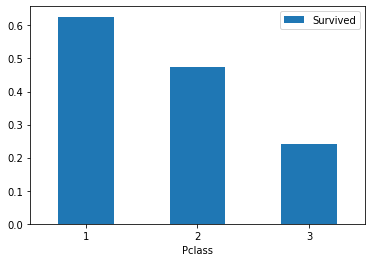

In [45]:
import matplotlib.pyplot as plt 

df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar(x='Pclass', rot=0, stacked=True)  

print('Number of Passengers')
print(df.groupby('Pclass').size().reset_index(name='count'))
print('-'*80)
print('Survival Rate')
print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print('-'*80)
print('Number of Survivor')
print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum())


As the Result below
- Female Passengers have the Highest Survival Rate, because in the actual situation, a Female Passengers will be picked into the lifeboat first before a Male Passengers. 

Number of Passengers
      Sex  count
0  female    312
1    male    577
--------------------------------------------------------------------------------
Survival Rate
      Sex  Survived
0  female  0.740385
1    male  0.188908
--------------------------------------------------------------------------------
Number of Survivor
      Sex  Survived
0  female       231
1    male       109


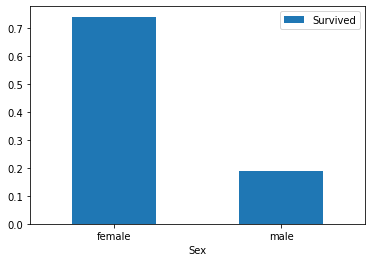

In [46]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar(x='Sex',rot=0,stacked=True)

print('Number of Passengers')
print(df.groupby('Sex').size().reset_index(name='count'))
print('-'*80)
print('Survival Rate')
print(df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())
print('-'*80)
print('Number of Survivor')
print(df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).sum())

As the Result below
 - A Child and a Female Passensers have a Higher Survival Rate than others.

Number of Passengers
         Title  count
0  FemaleChild     64
1       Master     40
2         Miss    119
3           Mr    517
4          Mrs    126
5      Officer      5
6      Royalty     18
--------------------------------------------------------------------------------
Survival Rate
         Title  Survived
0  FemaleChild  0.625000
1       Master  0.575000
2         Miss  0.739496
3           Mr  0.156673
4          Mrs  0.793651
5      Officer  0.400000
6      Royalty  0.333333
--------------------------------------------------------------------------------
Number of Survivor
         Title  Survived
0  FemaleChild        40
1       Master        23
2         Miss        88
3           Mr        81
4          Mrs       100
5      Officer         2
6      Royalty         6


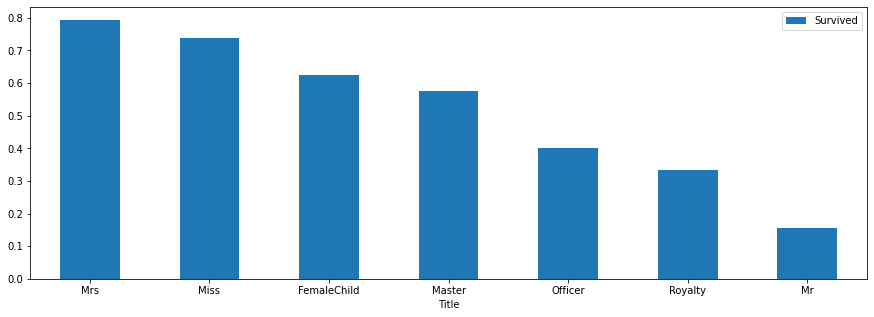

In [47]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar(x='Title',rot=0,stacked=True,figsize=(15,5))

print('Number of Passengers')
print(df.groupby('Title').size().reset_index(name='count'))
print('-'*80)
print('Survival Rate')
print(df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
print('-'*80)
print('Number of Survivor')
print(df[['Title', 'Survived']].groupby(['Title'], as_index=False).sum())


As the Result below
- Passengers with Age between 0-10 (a child) have a Highest Survival Rate.

Number of Passengers
  AgeGroup  count
0     0-10     75
1    11-20    102
2    21-30    334
3    31-40    187
4    41-50    118
5    51-60     48
6    61-70     18
7    71-80      6
--------------------------------------------------------------------------------
Survival Rate
  AgeGroup  Survived
0     0-10  0.546667
1    11-20  0.401961
2    21-30  0.305389
3    31-40  0.443850
4    41-50  0.398305
5    51-60  0.416667
6    61-70  0.277778
7    71-80  0.000000
--------------------------------------------------------------------------------
Number of Survivor
  AgeGroup  Survived
0     0-10        41
1    11-20        41
2    21-30       102
3    31-40        83
4    41-50        47
5    51-60        20
6    61-70         5
7    71-80         0


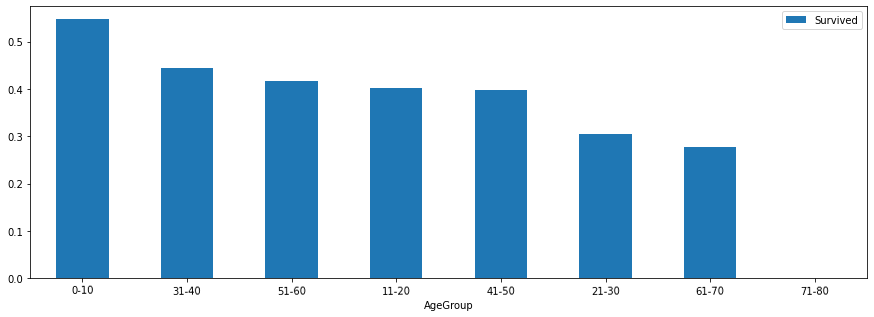

In [48]:
df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar(rot=1,stacked=True,x='AgeGroup',figsize=(15,5))

print('Number of Passengers')
print(df.groupby('AgeGroup').size().reset_index(name='count'))
print('-'*80)
print('Survival Rate')
print(df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean())
print('-'*80)
print('Number of Survivor')
print(df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).sum())

In [49]:
display(df[df.AgeGroup.isnull()])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0,S,Mr,NaN


## Label Encoding

### Deal with a Binary Column

In [50]:
df.dtypes

Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Title         object
AgeGroup    category
dtype: object

Checking Binary values from Categorical Columns

In [51]:
for i in df.columns[(df.dtypes =='object').values].tolist():
    print('-----------------------------------------------')
    print(i,'\n')
    print(df[i].value_counts())
    print('-----------------------------------------------')

-----------------------------------------------
Name 

Braund, Mr. Owen Harris              1
Boulos, Mr. Hanna                    1
Frolicher-Stehli, Mr. Maxmillian     1
Gilinski, Mr. Eliezer                1
Murdlin, Mr. Joseph                  1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Keane, Miss. Nora A                  1
Williams, Mr. Howard Hugh "Harry"    1
Dooley, Mr. Patrick                  1
Name: Name, Length: 889, dtype: int64
-----------------------------------------------
-----------------------------------------------
Sex 

male      577
female    312
Name: Sex, dtype: int64
-----------------------------------------------
-----------------------------------------------
Embarked 

S    644
C    168
Q     77
Name: Embarked, dtype: int64
-----------------------------------------------
-----------------------------------------------
Title 

Mr             517
Mrs            126
Miss           119


It's has only a Sex features that is a Binary

In [52]:
#Encoding Sex

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df

c:\Users\Sawit\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,S,Mr,21-30
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,C,Mrs,31-40
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,S,Miss,21-30
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,S,Mrs,31-40
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,S,Mr,31-40
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,S,Royalty,21-30
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,S,Miss,11-20
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,6.903846,1,2,23.4500,S,FemaleChild,0-10


### Deal with a Category

Creating a dummies for Category features

In [53]:
df = pd.get_dummies(df,columns=['Pclass','Title','Embarked','AgeGroup'])
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,AgeGroup_0-10,AgeGroup_11-20,AgeGroup_21-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61-70,AgeGroup_71-80
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,1,...,0,1,0,0,0,1,0,0,0,0


### Correlation

<AxesSubplot:>

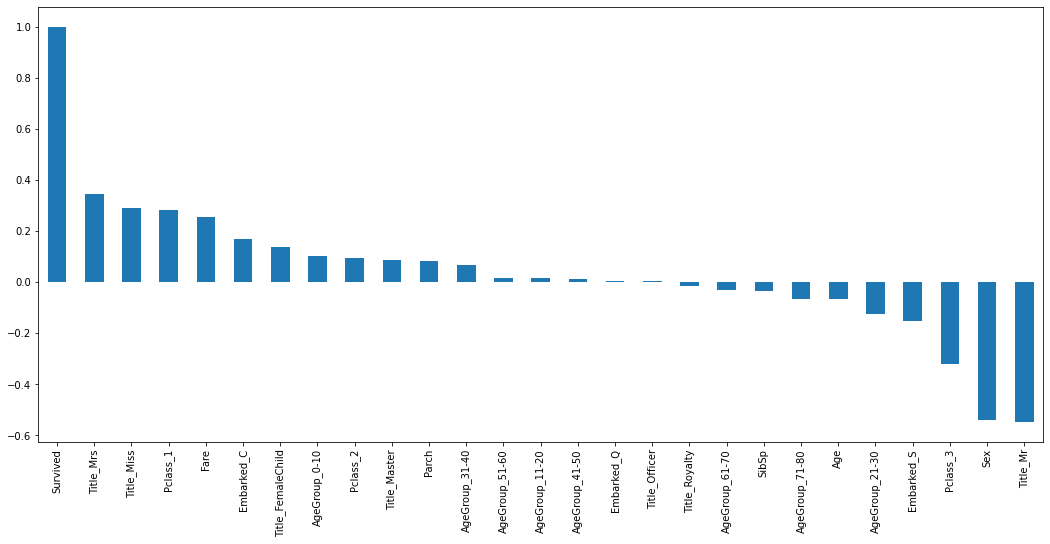

In [54]:
plt.figure(figsize=(18,8))
df.corr()['Survived'].sort_values(ascending = False).plot(kind='bar')

Drop Age and Name features, because we can use Age Group instead of Age

In [55]:
df = df.drop('Age',axis=1)
df = df.drop('Name',axis=1)

## Modeling

In [56]:
x = df.drop(columns = ['Survived'])
y = df['Survived'].values


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [58]:
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((622, 25), (622,), (267, 25), (267,))

### XGB

In [77]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix


xgboost = XGBClassifier(objective='reg:squarederror')
xgboost.fit(X_train, Y_train)

Y_pred_xgb = xgboost.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_pred_xgb)))
print('AUC Score is {:.5}'.format(metrics.roc_auc_score(Y_test, Y_pred_xgb)))
print(pd.DataFrame(confusion_matrix(Y_test,Y_pred_xgb)))

pd.crosstab(Y_test,Y_pred_xgb,rownames=["Actually"],colnames=["Prediction"],margins=True)

Accuracy Score is 0.79026
AUC Score is 0.77947
     0   1
0  132  25
1   31  79


c:\Users\Sawit\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Prediction,0,1,All
Actually,,,
0,132,25,157
1,31,79,110
All,163,104,267


### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_pred_DT)))
print('AUC Score is {:.5}'.format(metrics.roc_auc_score(Y_test, Y_pred_DT)))
print(pd.DataFrame(confusion_matrix(Y_test,Y_pred_DT)))
pd.crosstab(Y_test,Y_pred_DT,rownames=["Actually"],colnames=["Prediction"],margins=True)

Accuracy Score is 0.76404
AUC Score is 0.75582
     0   1
0  126  31
1   32  78


Prediction,0,1,All
Actually,,,
0,126,31,157
1,32,78,110
All,158,109,267


### Decision Tree with GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV
decision_tree_cv = DecisionTreeClassifier()
tree_params = [
    {'criterion': ['gini'], 'max_depth': [1, 5, 10], 'min_samples_leaf': range(1, 10)},
    {'criterion': ['entropy'], 'max_depth': [1, 5, 10], 'min_samples_leaf': range(1, 10)},
    {'criterion': ['log_loss'], 'max_depth': [1, 5, 10], 'min_samples_leaf': range(1, 10)}
]

gridtree = GridSearchCV(estimator=decision_tree_cv, param_grid=tree_params)
gridtree.fit(X_train, Y_train)

Y_pred_DT_cv = gridtree.predict(X_test)

print("Best hyperparameters: ", gridtree.best_params_)
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_pred_DT_cv)))
print('AUC Score is {:.5}'.format(metrics.roc_auc_score(Y_test, Y_pred_DT_cv)))
print(pd.DataFrame(confusion_matrix(Y_test,Y_pred_DT_cv)))

pd.crosstab(Y_test,Y_pred_DT_cv,rownames=["Actually"],colnames=["Prediction"],margins=True)

Best hyperparameters:  {'criterion': 'log_loss', 'max_depth': 5, 'min_samples_leaf': 2}
Accuracy Score is 0.79401
AUC Score is 0.76769
     0   1
0  144  13
1   42  68


Prediction,0,1,All
Actually,,,
0,144,13,157
1,42,68,110
All,186,81,267


### RandomForest

In [75]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_RF = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_pred_RF)))
print('AUC Score is {:.5}'.format(metrics.roc_auc_score(Y_test, Y_pred_RF)))
print(pd.DataFrame(confusion_matrix(Y_test,Y_pred_RF)))

pd.crosstab(Y_test,Y_pred_RF,rownames=["Actually"],colnames=["Prediction"],margins=True)

Accuracy Score is 0.81273
AUC Score is 0.79858
     0   1
0  138  19
1   31  79


Prediction,0,1,All
Actually,,,
0,138,19,157
1,31,79,110
All,169,98,267


### RandomForest with GridSearchCV

In [71]:
random_forest_cv = RandomForestClassifier()
forest_params = [
    {'max_features': ['sqrt'], 'max_depth': [3, 5, 7, None], 'n_estimators': [50, 100, 200]},
    {'max_features': ['log2'], 'max_depth': [3, 5, 7, None], 'n_estimators': [50, 100, 200]},
]

gridforest = GridSearchCV(estimator=random_forest_cv, param_grid=forest_params)
gridforest.fit(X_train, Y_train)

Y_pred_RF_cv = gridforest.predict(X_test)

print("Best hyperparameters: ", gridforest.best_params_)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_pred_RF_cv)))
print('AUC Score is {:.5}'.format(metrics.roc_auc_score(Y_test, Y_pred_RF_cv)))
print(pd.DataFrame(confusion_matrix(Y_test,Y_pred_RF_cv)))

pd.crosstab(Y_test,Y_pred_RF_cv,rownames=["Actually"],colnames=["Prediction"],margins=True)

Best hyperparameters:  {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy Score is 0.82772
AUC Score is 0.81268
     0   1
0  141  16
1   30  80


Prediction,0,1,All
Actually,,,
0,141,16,157
1,30,80,110
All,171,96,267


### Ranking Model

In [78]:
models = pd.DataFrame({
    'Model': ['XGBClassifier' ,'DecisionTreeClassifier','DecisionTreeClassifier With GridSearchCV','RandomForestClassifier','RandomForestClassifier With GridSearchCV'],
    'AUC Score': [metrics.roc_auc_score(Y_test, Y_pred_xgb),metrics.roc_auc_score(Y_test, Y_pred_DT),metrics.roc_auc_score(Y_test, Y_pred_DT_cv),metrics.roc_auc_score(Y_test, Y_pred_RF),metrics.roc_auc_score(Y_test, Y_pred_RF_cv)]})
models.sort_values(by='AUC Score', ascending=False)

,Model,AUC Score
4,RandomForestClassifier With GridSearchCV,0.812681
3,RandomForestClassifier,0.798581
0,XGBClassifier,0.779473
2,DecisionTreeClassifier With GridSearchCV,0.767690
1,DecisionTreeClassifier,0.755819


## After we got the 1st Ranking Model, we will use that Model to Predict a new Dataset 

Load a New  Data set to use RandomForestClassifier With GridSearchCV to Predict it

In [79]:
df_predict = pd.read_csv('test.csv',index_col=[0], parse_dates=[0])

As you can see, this Dataset has no Survived column that's mean we have to predict it.

In [80]:
df_predict

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### Prepocessing Testing data in the same way Traning Data Set did

In [81]:
# ------------------------------- Drop Cabin and Ticket features --------------------------------------------------#
df_predict = df_predict.drop('Cabin',axis=1)
df_predict = df_predict.drop('Ticket',axis=1)

# ------------------------------- Create Title Name ---------------------------------------------------------------#
df_predict['Title'] = df_predict['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

df_predict['Title']= df_predict.Title.map(TitleDict) 

for df_predict in [df_predict]:
    df_predict.loc[(df_predict.Title=='Miss') & (df_predict.Parch!=0),'Title']="FemaleChild"

# ------------------------------- Fill Age ------------------------------------------------------------------------#
df_predict['Age']= df_predict.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

# ------------------------------- Drop where Embarked is null  ----------------------------------------------------#
df_predict = df_predict.dropna()

# ------------------------------- Creating Age Group --------------------------------------------------------------#
bins= [0,10,20,30,40,50,60,70,80]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
df_predict['AgeGroup'] = pd.cut(df_predict['Age'], bins=bins, labels=labels, right=False)

# ------------------------------- Make a coppy of Data Set---------------------------------------------------------#
df_predict1 = df_predict

# ------------------------------- Deal with Binary features -------------------------------------------------------#
encoder = LabelEncoder()
df_predict1 ['Sex'] = encoder.fit_transform(df_predict1 ['Sex'])

# ------------------------------- Deal with Category features -----------------------------------------------------#
df_predict1 = pd.get_dummies(df_predict1,columns=['Pclass','Title','Embarked','AgeGroup'])

# ------------------------------- Drop Age and Name ---------------------------------------------------------------#
df_predict1 = df_predict1.drop('Age',axis=1)
df_predict1 = df_predict1.drop('Name',axis=1)

In [84]:
df_predict1.head()

,Sex,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Title_FemaleChild,Title_Master,Title_Miss,...,Embarked_Q,Embarked_S,AgeGroup_0-10,AgeGroup_11-20,AgeGroup_21-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61-70,AgeGroup_71-80
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,1,0,0,7.8292,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
893,0,1,0,7.0000,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
894,1,0,0,9.6875,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
895,1,0,0,8.6625,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
896,0,1,1,12.2875,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Use RandomForestClassifier With GridSearchCV to Predict it and display it as a Probability Score

In [85]:
score = gridforest.predict_proba(df_predict1)

In [86]:
score_df = pd.DataFrame(score)
score_df.head()

,0,1
0,0.881590,0.118410
1,0.580095,0.419905
2,0.901822,0.098178
3,0.906887,0.093113
4,0.505336,0.494664


### Merge the Predictive Score into our Dataset

In [87]:
score_df = pd.DataFrame(score, columns=['proba_0', 'proba_1'])
result = pd.concat([df_predict.reset_index(drop=True), score_df], axis=1)

result = result.drop('proba_0',axis=1)
result = result.rename(columns={'proba_1': 'Survival_Score'})
result

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,Survival_Score
0,3,"Kelly, Mr. James",1,34.500000,0,0,7.8292,Q,Mr,31-40,0.118410
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,7.0000,S,Mrs,41-50,0.419905
2,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,9.6875,Q,Mr,61-70,0.098178
3,3,"Wirz, Mr. Albert",1,27.000000,0,0,8.6625,S,Mr,21-30,0.093113
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,12.2875,S,Mrs,21-30,0.494664
...,...,...,...,...,...,...,...,...,...,...,...
411,3,"Henriksson, Miss. Jenny Lovisa",0,28.000000,0,0,7.7750,S,Miss,21-30,0.507857
412,3,"Spector, Mr. Woolf",1,28.724891,0,0,8.0500,S,Mr,21-30,0.095410
413,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,7.2500,S,Mr,31-40,0.104708
414,3,"Ware, Mr. Frederick",1,28.724891,0,0,8.0500,S,Mr,21-30,0.095410


## Explore the result

Creating a Survival_Tier from Survival_Score for making a  Passengers Segmentation


In [106]:
print("Max Survival_Score is  ",result["Survival_Score"].max())
print("Min Survival_Score is  ",result["Survival_Score"].min())

Max Survival_Score is   0.9660751253766712
Min Survival_Score is   0.08512398311181961


In [99]:
bin1= [0,0.261,0.437,0.613,0.789,1]
label1 = ['Very_Low','Low','Medium','High','Very_High']
result['Survival_Tier'] = pd.cut(result['Survival_Score'], bins=bin1, labels=label1, right=False)

In [100]:
result

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,Survival_Score,Survival_Tier
0,3,"Kelly, Mr. James",1,34.500000,0,0,7.8292,Q,Mr,31-40,0.118410,Very_Low
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,7.0000,S,Mrs,41-50,0.419905,Low
2,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,9.6875,Q,Mr,61-70,0.098178,Very_Low
3,3,"Wirz, Mr. Albert",1,27.000000,0,0,8.6625,S,Mr,21-30,0.093113,Very_Low
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,12.2875,S,Mrs,21-30,0.494664,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
411,3,"Henriksson, Miss. Jenny Lovisa",0,28.000000,0,0,7.7750,S,Miss,21-30,0.507857,Medium
412,3,"Spector, Mr. Woolf",1,28.724891,0,0,8.0500,S,Mr,21-30,0.095410,Very_Low
413,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,7.2500,S,Mr,31-40,0.104708,Very_Low
414,3,"Ware, Mr. Frederick",1,28.724891,0,0,8.0500,S,Mr,21-30,0.095410,Very_Low


As the Result below
- Female Passengers(Sex = 0) mostly have a Very_High in Survival_Tier (52.32% in Female Passengers)
- Male Passengers(Sex = 1) mostly have a Very_Low in Survival_Tier (73.58% in Male Passengers)
- There is no Male Passengers who has  a Very_High in Survival_Tier
- There is only 2 Female Passengers who has a Very_Low in Survival_Tier

In [104]:
group_Survival_Tier_Sex = result.groupby(['Survival_Tier', 'Sex']).size().reset_index(name='Count')
Pivot__Survival_Tier_Sex = group_Survival_Tier_Sex.pivot_table(index='Survival_Tier', columns='Sex', values='Count', fill_value=0)
Pivot__Survival_Tier_Sex

Sex,0,1
Survival_Tier,,
Very_Low,2,195
Low,10,46
Medium,34,11
High,26,13
Very_High,79,0


As the Result below
- In the Very_High in Survival_Tier all are the passengers who has a Title name with FemaleChild, Miss, Mrs
- In the Very_Low in Survival_Tier mostly are the passengers who has a Title name with Mr
- There is a 2 FemaleChild and 3 Master who is in the Very_Low in Survival_Tier


In [107]:
group_Survival_Tier_Title = result.groupby(['Survival_Tier', 'Title']).size().reset_index(name='Count')
Pivot__Survival_Tier_Title = group_Survival_Tier_Title.pivot_table(index='Survival_Tier', columns='Title', values='Count', fill_value=0)
Pivot__Survival_Tier_Title

Title,FemaleChild,Master,Miss,Mr,Mrs,Officer,Royalty
Survival_Tier,,,,,,,
Very_Low,2,3,0,192,0,0,0
Low,1,2,5,43,4,0,1
Medium,7,3,11,4,16,2,2
High,0,13,22,0,4,0,0
Very_High,12,0,18,0,49,0,0


As the Result below
- All the Passengers who has a Title name with "FemaleChild", "Master","Miss","Mrs" and have the Very_Low or Low in Survival_Tier  have the same 3rd Class Ticket (Pclass = 3)

In [111]:
result[(result["Title"].isin(["FemaleChild", "Master","Miss","Mrs"])) & (result["Survival_Tier"].isin(["Very_Low", "Low"]))]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,Survival_Score,Survival_Tier
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,7.0000,S,Mrs,41-50,0.419905,Low
18,3,"Ilmakangas, Miss. Ida Livija",0,27.000000,1,0,7.9250,S,Miss,21-30,0.413964,Low
33,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",0,33.515152,1,2,23.4500,S,Mrs,31-40,0.433600,Low
37,3,"Cacic, Miss. Manda",0,21.000000,0,0,8.6625,S,Miss,21-30,0.434644,Low
55,3,"Rice, Master. Albert",1,10.000000,4,1,29.1250,Q,Master,11-20,0.189393,Very_Low
132,3,"Lefebre, Mrs. Frank (Frances)",0,33.515152,0,4,25.4667,S,Mrs,31-40,0.367213,Low
140,3,"Goodwin, Miss. Jessie Allis",0,10.000000,5,2,46.9000,S,FemaleChild,11-20,0.221656,Very_Low
153,3,"Asplund, Master. Filip Oscar",1,13.000000,4,2,31.3875,S,Master,11-20,0.249416,Very_Low
168,3,"Hellstrom, Miss. Hilda Maria",0,22.000000,0,0,8.9625,S,Miss,21-30,0.434644,Low
187,3,"Sage, Miss. Ada",0,6.903846,8,2,69.5500,S,FemaleChild,0-10,0.184455,Very_Low


As the Result of  2 Pivot below
- In the Very_High in Survival_Tier mostly are the passengers who has a 1st Class and 2nd Class Ticket
- In the Very_Low in Survival_Tier mostly are the passengers who has a 3rd Class Ticket
- There is a 7 Passengers who has a 1st Class Ticket and have the Very_Low in Survival_Tier and they are all Male Passengers (Sex=1)
- There is a 2 Passengers who has a 3rd Class Ticket and have the Very_High in Survival_Tier and they are all Female Passengers (Sex=0)

In [112]:
group_Survival_Tier_Pclass = result.groupby(['Survival_Tier', 'Pclass']).size().reset_index(name='Count')
Pivot__Survival_Tier_Pclass = group_Survival_Tier_Pclass.pivot_table(index='Survival_Tier', columns='Pclass', values='Count', fill_value=0)
Pivot__Survival_Tier_Pclass

Pclass,1,2,3
Survival_Tier,,,
Very_Low,7,59,131
Low,41,1,14
Medium,7,1,37
High,2,4,33
Very_High,49,28,2


In [113]:
group_Survival_Tier_Pclass_Sex = result.groupby(['Survival_Tier', 'Pclass', 'Sex']).size().reset_index(name='Count')
pivot_Survival_Tier_Pclass_Sex = group_Survival_Tier_Pclass_Sex.pivot_table(index=['Survival_Tier', 'Sex'], columns='Pclass', values='Count', fill_value=0)
pivot_Survival_Tier_Pclass_Sex

Pclass              1   2    3
Survival_Tier Sex             
Very_Low      0     0   0    2
              1     7  59  129
Low           0     0   0   10
              1    41   1    4
Medium        0     0   0   34
              1     7   1    3
High          0     0   2   24
              1     2   2    9
Very_High     0    49  28    2
              1     0   0    0

# - THE END - 